In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

In [120]:
A=pd.read_csv('housing.csv',index_col=0)
A.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


/usr/local/anaconda/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


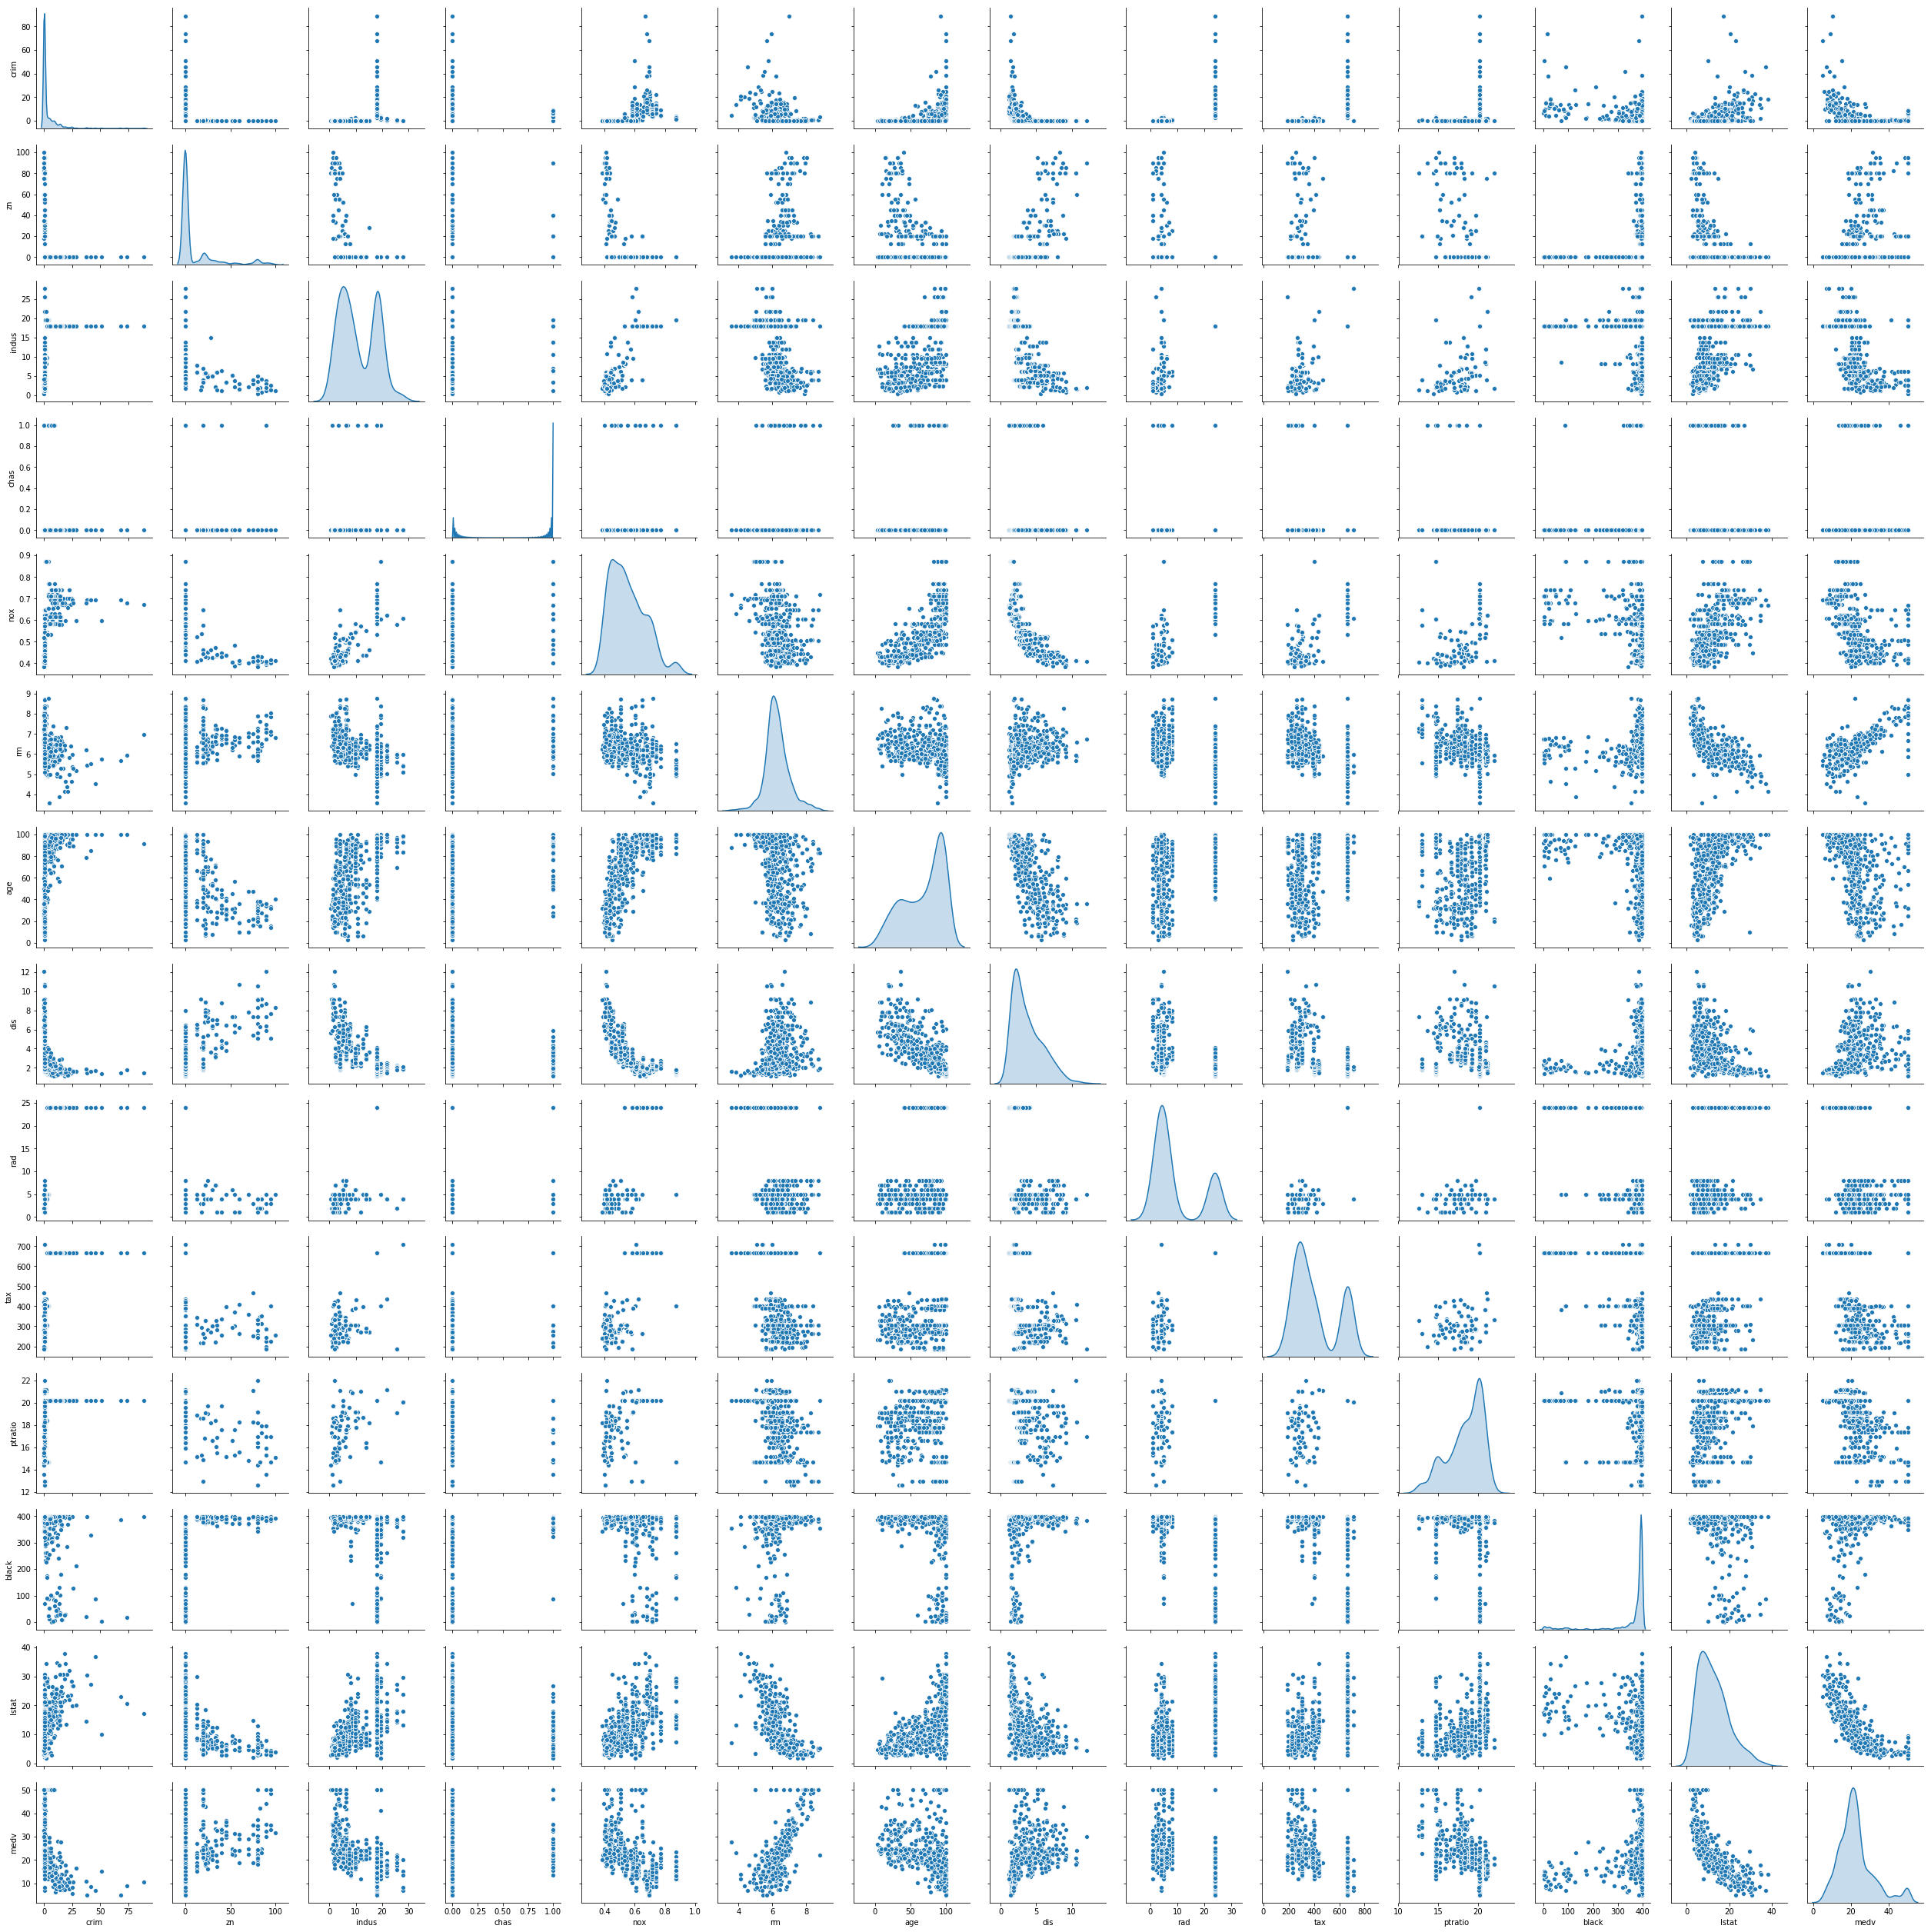

In [5]:
sns.pairplot(A,diag_kind='kde')

In [6]:
A.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [13]:
A.shape

(506, 14)

In [11]:
m1=smf.ols('medv~crim+zn+chas+indus+age+nox+rm+dis+rad+tax+ptratio+black+lstat',A).fit()

In [12]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          6.72e-135
Time:                        08:52:53   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
chas           2.6867      0.862      3.118      0.002       0.994       4.380
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
age            0.0007      0.013      0.052      0.958      -0.025       0.027
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
A.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [208]:
X=A.drop(['medv','indus','age'],axis=1)
Y=A[['medv']]

In [19]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
m1=LinearRegression()
m1.fit(Xtrain[['lstat']],ytrain)
ypred=m1.predict(Xtest[['lstat']])
rmse=np.sqrt(np.mean((ytest-ypred)**2))
rmse

6.528418144661057

In [25]:
m2=LinearRegression()
m2.fit(Xtrain[['lstat','ptratio']],ytrain)
ypred2=m2.predict(Xtest[['lstat','ptratio']])
rmse2=np.sqrt(np.mean((ytest-ypred2)**2))
rmse2

6.021130288603244

In [26]:
m3=LinearRegression()
m3.fit(Xtrain[['lstat','ptratio','rm']],ytrain)
ypred3=m3.predict(Xtest[['lstat','ptratio','rm']])
rmse3=np.sqrt(np.mean((ytest-ypred3)**2))
rmse3

5.039931488838318

In [123]:
model=LinearRegression()
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [124]:
model.coef_

array([ 3.52839125, -0.93396631, -0.60681801])

In [125]:
model.intercept_

25.373484464182297

In [126]:
y_pred=model.predict(Xtest)
rmse=np.sqrt(np.mean((ytest-y_pred)**2))
rmse

5.039931488838319

In [21]:
model.score(Xtest,ytest)

0.7854584464532379

In [11]:
c=np.arange(len(model.coef_))

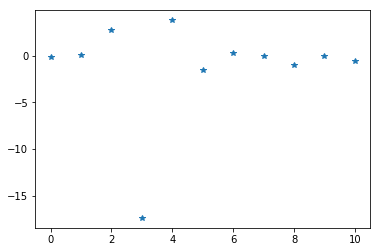

In [117]:
plt.plot(c,model.coef_,'*')

In [107]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [108]:
rd=Ridge(alpha=0.5,normalize=True)
Ls=Lasso(alpha=0.05,normalize=True)

In [109]:
rd.fit(Xtrain,ytrain)
rd_pred=rd.predict(Xtest)
Ls.fit(Xtrain,ytrain)
Ls_pred=Ls.predict(Xtest)

In [111]:
from sklearn.metrics import mean_squared_error
rd_rmse=np.sqrt(mean_squared_error(ytest,rd_pred))
rd_rmse

5.17290166386151

In [116]:
rd.coef_

array([-6.21232110e-02,  2.53021356e-02,  2.42287254e+00, -7.37682910e+00,
        3.00611540e+00, -3.38250499e-01,  2.23228688e-02, -2.29328740e-03,
       -6.76718844e-01,  6.29397583e-03, -3.50624741e-01])

In [112]:
Ls_rmse=np.sqrt(mean_squared_error(ytest,Ls_pred))
Ls_rmse

5.430066369201326

In [113]:
variables=X.columns

In [117]:
Ls.coef_

array([-0.        ,  0.        ,  0.19244044, -0.        ,  2.85714386,
       -0.        , -0.        , -0.        , -0.64744443,  0.        ,
       -0.54810532])

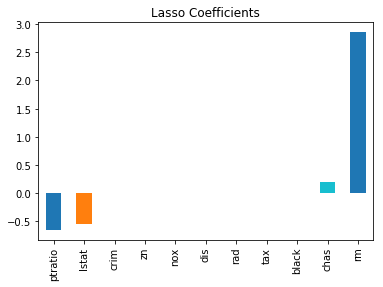

In [118]:
lasso_beta=pd.Series(Ls.coef_,variables).sort_values()
lasso_beta.plot(kind='bar',title='Lasso Coefficients')

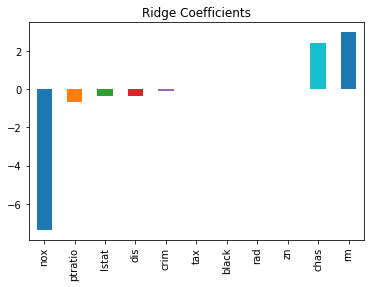

In [115]:
ridge_beta=pd.Series(rd.coef_,variables).sort_values()
ridge_beta.plot(kind='bar',title='Ridge Coefficients')

In [139]:
med_pred=model.predict(X)
rmse=np.sqrt(np.mean((Y-med_pred)**2))
rmse

4.679735971158225

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
np.sqrt(mean_squared_error(Y,med_pred))

4.679735971158223

In [19]:
model.score(X,Y)

0.7405822802569575

In [21]:
r2_score(Y,med_pred)

0.7405822802569575

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
xtrain=Xtrain[['lstat']] #Lower status of population (density)
 #Housing Values in $1000

In [76]:
#Quadratic Regression Model
qr=PolynomialFeatures(degree=4)
x_qr=qr.fit_transform(xtrain)


In [77]:
type(x_qr)

numpy.ndarray

In [78]:
x_qr_df=pd.DataFrame(x_qr)
x_qr_df.head()

,0,1,2,3,4
0,1.0,8.26,68.2276,563.559976,4655.005402
1,1.0,14.44,208.5136,3010.936384,43477.921385
2,1.0,21.24,451.1376,9582.162624,203525.134134
3,1.0,4.32,18.6624,80.621568,348.285174
4,1.0,7.12,50.6944,360.944128,2569.922191


In [79]:
x_qr_df=x_qr_df.drop(0,axis=1)

In [80]:
x_qr_df.shape

(354, 4)

In [81]:
idx=np.arange(Xtrain.shape[0])

In [84]:
ytrain.index=idx

In [85]:
x_qr_df=pd.concat([x_qr_df,ytrain],axis=1)

In [86]:
x_qr_df.columns=['f1','f2','f3','f4','medv']


In [87]:
x_qr_df.head()

,f1,f2,f3,f4,medv
0,8.26,68.2276,563.559976,4655.005402,20.4
1,14.44,208.5136,3010.936384,43477.921385,16.0
2,21.24,451.1376,9582.162624,203525.134134,13.3
3,4.32,18.6624,80.621568,348.285174,30.8
4,7.12,50.6944,360.944128,2569.922191,27.5


In [90]:
m4=LinearRegression()
m4_ols=smf.ols('medv~f1+f2+f3+f4',x_qr_df).fit()

In [92]:
m4.fit(x_qr_df[['f1','f2','f3','f4']],ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
xtest=Xtest[['lstat']]

In [102]:
xtest=qr.fit_transform(xtest)

In [103]:
xtest=pd.DataFrame(xtest)
xtest=xtest.drop(0,axis=1)

In [104]:
xtest.head()

,1,2,3,4
0,7.53,56.7009,426.957777,3214.992061
1,7.18,51.5524,370.146232,2657.649946
2,18.80,353.4400,6644.672000,124919.833600
3,8.10,65.6100,531.441000,4304.672100
4,10.19,103.8361,1058.089859,10781.935663


In [105]:
ypred4=m4.predict(xtest)

In [106]:
rmse4=np.sqrt(np.mean((ytest-ypred4)**2))
rmse4

5.752311630721805

In [114]:
x=x_qr_df[['f1','f2','f3','f4','f5']]
pr=LinearRegression()
pr.fit(x,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [132]:
ytrain.shape

(354,)

In [133]:
xtrain.shape

(354, 1)

In [107]:
xtest=Xtest[['lstat']] 

In [108]:
xtest_new=qr.fit_transform(xtest)

In [110]:
xtest_new=pd.DataFrame(xtest_new)

In [116]:
xtest_new=xtest_new.drop(0,axis=1)

In [117]:
xtest_new.shape

(152, 5)

In [118]:
pr_predict=pr.predict(xtest_new)

In [127]:
from sklearn import metrics
pr_rmse=np.sqrt(np.mean((ytest-pr_predict)**2))
pr_rmse

5.7310160379175255

In [98]:
pr.score(x,y)

0.6816897416931834

In [164]:
#Testing model with new sample
x_test=qr.fit_transform(4.81)
x_test

array([[  1.        ,   4.81      ,  23.1361    , 111.284641  ,
        535.27912321]])

In [165]:
x_test_df=pd.DataFrame(x_test)

In [170]:
x_test_df.transpose()[0]

0      1.000000
1      4.810000
2     23.136100
3    111.284641
4    535.279123
Name: 0, dtype: float64

In [173]:
xt=x_test_df.transpose()[0][1:]#to drop the first column

In [174]:
m2.predict([xt])

array([[33.25580052]])

In [123]:
X.head()

,crim,zn,chas,nox,rm,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,0,0.538,6.575,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,0,0.469,6.421,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,0,0.469,7.185,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,0,0.458,6.998,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,0,0.458,7.147,6.0622,3,222,18.7,396.90,5.33


In [223]:
from sklearn import metrics
from sklearn.model_selection import KFold
LR=LinearRegression(normalize=True)
Ridge_R=Ridge(alpha=0.5,normalize=True)
Lasso_R=Lasso(alpha=0.1,normalize=True)

In [224]:
kf=KFold(n_splits=3,shuffle=True,random_state=2)
for model, name in zip([LR,Ridge_R,Lasso_R],['MVLR','Ridge','Lasso']):
    rmse=[]
    for train,test in kf.split(X,Y):
        Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
        Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        rmse.append(np.sqrt(metrics.mean_squared_error(Ytest,Y_predict)))
    print(rmse)
    print("Cross_Validated_rmse_score: %0.03f (+/- %0.5f) [%s]" % (np.mean(rmse),np.var(rmse,ddof=1),name))   

[4.758648263883589, 5.859039361628368, 3.8495002472158006]
Cross_Validated_rmse_score: 4.822 (+/- 1.01261) [MVLR]
[5.099206672107381, 6.37922102726317, 4.1337059640205345]
Cross_Validated_rmse_score: 5.204 (+/- 1.26883) [Ridge]
[5.746932166446457, 6.68604365121102, 4.854408796648236]
Cross_Validated_rmse_score: 5.762 (+/- 0.83890) [Lasso]
